# On main branch, this file should be non executed and no parameters set.
# On dev_ branch, it must be fully executed and must include tests.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

import estimate_critical_q as est

## Notebook Parameters

In [3]:
# Set the filename of the database and the visibility parameter v
# Example: 
#
# db_path = 'test__phys_quant.csv'
# v = 0.5
# 
# OBS: At the development time the file test__full.csv was a copy of
# results_databases/bubble_filtering__8_neighbors_squared_network__MXU.csv

db_path = 'test__full.csv'
v = 0.5

## Main
At the normal uses, the below code should not be changed.

In [4]:
# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Select the data corresponding to the given visibility v.
phys_quant = full[full.v == v]

# Get the number of sites
N = phys_quant.N.unique()

# Set the index to N and q
phys_quant.set_index(['N','q'], inplace=True)

print('N =', N)

N = [  400  1600  3600  6400 10000]


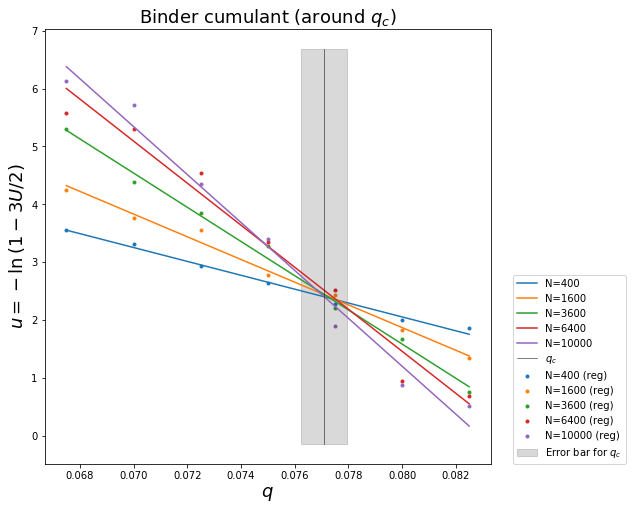



CRITICAL POINT

       q_c = 0.077106 ± 0.000862


In [21]:
qc, qc_error, best_regs, binder = est.estimate(N[:], phys_quant, 
                                               #min_half_bandwidth=1,
                                               #max_half_bandwidth=3,
                                               do_plot=True)

In [ ]:
qc

In [ ]:
qc_error

In [ ]:
binder

In [ ]:
best_regs

Para testar vou ter de salvar uns csv com nome que inicia em test__
e confiar que meu codigo aqui está correto.
Aparentente está pois tem concordância razoável com o código que eu
usava antes.

Uma ideia também é eu fornecer o intervalo de valores de q ao invés de
calcular automaticamente. Isso é bom para testes de coerência.

As variaveis min_half_bandwith and max_half_bandwidth tem algo de incoerente entre si. Talvez fosse bom investigar isso.

<br><br>
## Testing

In [ ]:
import pandas as pd
import unittest
import estimate_critical_q as est

class Test_estimate_critical_q(unittest.TestCase):
    
    '''
    The test cases included here runs only for the data in the
    
    bubble_filtering__8_neighbors_squared_network__MXU.csv
    
    dataset. It is not easy to include cases because it relies on
    visual inspection of the binder cumulant plot.
    
    '''
    
    def prepare_data(self, v):
        
        # Select the data corresponding to the given visibility v.
        # and set the index to N and q
        phys_quant = full[full.v == v]
        phys_quant.set_index(['N','q'], inplace=True)
        
        return phys_quant
        
        
    # test for v = 1.00
    def test_v_100(self):
        f = est.find_qc_candidate
        phys_quant = self.prepare_data(1.00)
        self.assertEqual(f(  400, 1600,phys_quant), 0.1425)
        self.assertEqual(f(  400, 3600,phys_quant), 0.1450)
        self.assertEqual(f(  400, 6400,phys_quant), 0.1425)
        self.assertEqual(f(  400,10000,phys_quant), 0.1425)
        self.assertEqual(f( 1600, 3600,phys_quant), 0.1450)
        self.assertEqual(f( 1600, 6400,phys_quant), 0.1450)
        self.assertEqual(f( 1600,10000,phys_quant), 0.1425)
        self.assertEqual(f( 3600, 6400,phys_quant), 0.1425)
        self.assertEqual(f( 3600,10000,phys_quant), 0.1425)
        self.assertEqual(f( 6400,10000,phys_quant), 0.1425)
        
    # test for v = 0.50
    def test_v_050(self):
        f = est.find_qc_candidate
        phys_quant = self.prepare_data(0.50)
        self.assertEqual(f(  400, 1600,phys_quant), 0.0800)
        self.assertEqual(f(  400, 3600,phys_quant), 0.0775)
        self.assertEqual(f(  400, 6400,phys_quant), 0.0800)
        self.assertEqual(f(  400,10000,phys_quant), 0.0775)
        self.assertEqual(f( 1600, 3600,phys_quant), 0.0775)
        self.assertEqual(f( 1600, 6400,phys_quant), 0.0800)
        self.assertEqual(f( 1600,10000,phys_quant), 0.0775)
        self.assertEqual(f( 3600, 6400,phys_quant), 0.0800)
        self.assertEqual(f( 3600,10000,phys_quant), 0.0775)
        self.assertEqual(f( 6400,10000,phys_quant), 0.0725)
        

        # test for v = 0.25
    def test_v_025(self):
        f = est.find_qc_candidate
        phys_quant = self.prepare_data(0.25)
        self.assertEqual(f(  400, 1600,phys_quant), None)
        self.assertEqual(f(  400, 3600,phys_quant), None)
        self.assertEqual(f(  400, 6400,phys_quant), None)
        self.assertEqual(f(  400,10000,phys_quant), None)
        self.assertEqual(f( 1600, 3600,phys_quant), 0.002)
        self.assertEqual(f( 1600, 6400,phys_quant), 0.002)
        self.assertEqual(f( 1600,10000,phys_quant), 0.0005)
        self.assertEqual(f( 3600, 6400,phys_quant), 0.0005)
        self.assertEqual(f( 3600,10000,phys_quant), 0.0005)
        self.assertEqual(f( 6400,10000,phys_quant), 0.0015)

In [ ]:
db_path = 'test__full.csv'

# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)